# Intervalo de confiança do coeficiente de correlação em relação ao nível de alfa

Este script desenha o gráfico com o intervalo de confiança estimado para o $r_{pearson}$ para um intervalo de valores de alfa.

Basta apenas entrar o com o valor do coeficiente, o tamanho amostral e escolher o valor mínimo e máximo de $\alpha$.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

In [2]:
r_pearson = 0.9 # o coeficiente de correlação
n_size = 30 # o número de amostras
min_alfa = 0.001 # o valor inicial do nível de significância  inicial de alfa (0.05 corresponde a 95% de confiância, o valor geralmente adotado)
max_alfa = 0.999 # o valor final do nível de significância  inicial de alfa (0.95 = corresponde a 5% de confiância, um valor muito baixo)


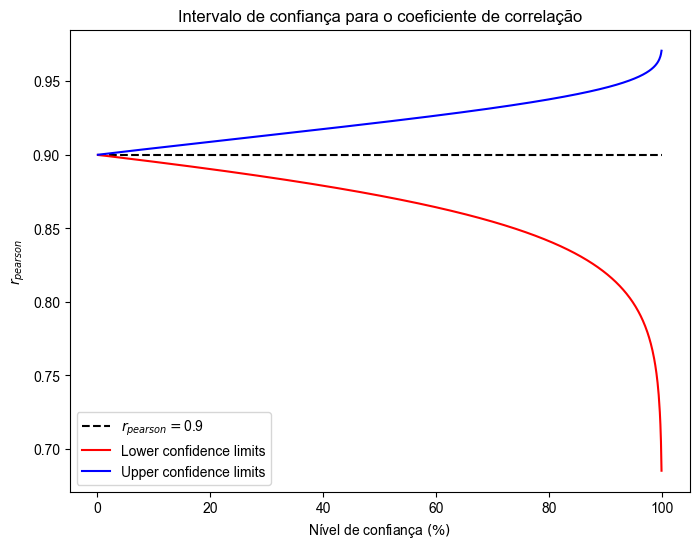

In [3]:
# criando varios valores de alfa dentro do limite estabelecido
alfa = np.linspace(min_alfa, max_alfa, 1000)

# transformando o valor do r de pearson
r_transformed = np.arctanh(r_pearson)

# obtendo o valor critico da distribuição Normal para cada alfa
z_critical = stats.norm.ppf(1 - alfa/2)

# calculando o intervalo de confiança para cada alfa
ic = z_critical/np.sqrt(n_size-3)

# calculando os limties inferior e superior na unidade transformada
ic_lower_transformed = r_transformed - ic
ic_upper_transformed = r_transformed + ic

# transformando os limites para a distribuição r de pearson
ic_lower = np.tanh(ic_lower_transformed)
ic_upper = np.tanh(ic_upper_transformed)

# calculando a confiança de cada alfa
alfa = 100*(1-alfa)

# plotando o gráfico
# criando o canvas
plt.figure(figsize=(8,6))
# adicionando a linha teórica
text = "$r_{pearson} = $" + f"{round(r_pearson, 4)}"
plt.plot([alfa.min(), alfa.max()], [r_pearson,r_pearson], label=text, c='k', ls='--')
# adicionando o limite inferior
plt.plot(alfa, ic_lower, label="Lower confidence limits", c='r')
# adicionando o limite superior
plt.plot(alfa, ic_upper, label="Upper confidence limits", c='b')
# adicionando titulos
plt.title("Intervalo de confiança para o coeficiente de correlação")
plt.xlabel("Nível de confiança $(\%)$")
plt.ylabel("$r_{pearson}$")
# adiiconando a legenda, com posição variando com o sinal de r de pearson
if r_pearson < 0.0:
    plt.legend(loc=2)
else:
    plt.legend(loc=3)
# plt.savefig("r_pearson.png", dpi=100, bbox_inches='tight')
plt.show()
